In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r"Walmart_Store_sales.csv")
#print(df)
def check_date(dd,mm,yyyy,x):
    global bool
    global month
    global year
    global sales
    if len(str(dd)) == 2 and len(str(mm)) == 2:
        d1 = dt.datetime(int(yyyy), int(mm), dd)
        date_data = df["Date"].loc[x]
        d1 = str(d1)
        date_slash = d1[8]+d1[9]+"/"+d1[5]+d1[6]+"/"+d1[0:4]
        date_hyphen = d1[8]+d1[9]+"-"+d1[5]+d1[6]+"-"+d1[0:4]
        if date_data == date_slash:
            bool = True
        elif date_data == date_hyphen:
            bool = True
        else:
            bool = False
        if (date_data[5] == "/" and date_data[2] == "/") or (date_data[3] != "0" and date_data[0] != "0"):
            if date_slash[3:5] == date_data[3:5] and date_slash[-4:] == date_data[-4:]:
                month = str(mm)
                year = str(yyyy)
                sales = df["Weekly_Sales"].loc[x]
            elif date_hyphen[3:5] == date_data[3:5] and date_hyphen[-4:] == date_data[-4:]:
                month = str(mm)
                year = str(yyyy)
                sales = df["Weekly_Sales"].loc[x]
            else:
                month = 0
                year = 0
                sales = 0
    elif len(str(dd)) == 2 and len(str(mm)) == 1:
        d1 = dt.datetime(int(yyyy), int(mm), dd)
        date_data = df["Date"].loc[x]
        d1 = str(d1)
        date_slash = d1[8]+d1[9]+"/"+d1[6]+"/"+d1[0:4]
        date_hyphen = d1[8]+d1[9]+"-"+d1[5]+d1[6]+"-"+d1[0:4]
        if date_data == date_slash:
            bool = True
        elif date_data == date_hyphen:
            bool = True
        else:
            bool = False
        if (date_data[4] == "/" and date_data[2] == "/") or (date_data[3] == "0" and date_data[0] != "0"):
            if date_slash[3] == date_data[3] and date_slash[-4:] == date_data[-4:]:
                month = str(mm)
                year = str(yyyy)
                sales = df["Weekly_Sales"].loc[x]
            elif date_hyphen[3:5] == date_data[3:5] and date_hyphen[-4:] == date_data[-4:]:
                month = str(mm)
                year = str(yyyy)
                sales = df["Weekly_Sales"].loc[x]
            else:
                month = 0
                year = 0
                sales = 0
    elif len(str(dd)) == 1 and len(str(mm)) == 2:
        d1 = dt.datetime(int(yyyy), int(mm), dd)
        date_data = df["Date"].loc[x]
        d1 = str(d1)
        date_slash = d1[9]+"/"+d1[5]+d1[6]+"/"+d1[0:4]
        date_hyphen = d1[8]+d1[9]+"-"+d1[5]+d1[6]+"-"+d1[0:4]
        if date_data == date_slash:
            bool = True
        elif date_data == date_hyphen:
            bool = True
        else:
            bool = False
        if (date_data[4] == "/" and date_data[1] == "/") or (date_data[3] != "0" and date_data[0] == "0"):
            if date_slash[2:4] == date_data[2:4] and date_slash[-4:] == date_data[-4:]:
                month = str(mm)
                year = str(yyyy)
                sales = df["Weekly_Sales"].loc[x]
            elif date_hyphen[3:5] == date_data[3:5] and date_hyphen[-4:] == date_data[-4:]:
                month = str(mm)
                year = str(yyyy)
                sales = df["Weekly_Sales"].loc[x]
            else:
                month = 0
                year = 0
                sales = 0
    elif len(str(dd)) == 1 and len(str(mm)) == 1:
        d1 = dt.datetime(int(yyyy), int(mm), dd)
        date_data = df["Date"].loc[x]
        d1 = str(d1)
        date_slash = d1[9]+"/"+d1[6]+"/"+d1[0:4]
        date_hyphen = d1[8]+d1[9]+"-"+d1[5]+d1[6]+"-"+d1[0:4]
        if date_data == date_slash:
            bool = True
        elif date_data == date_hyphen:
            bool = True
        else:
            bool = False
        if (date_data[3] == "/" and date_data[1] == "/") or (date_data[3] == "0" and date_data[0] == "0"):
            if date_slash[2] == date_data[2] and date_slash[-4:] == date_data[-4:]:
                month = str(mm)
                year = str(yyyy)
                sales = df["Weekly_Sales"].loc[x]
            elif date_hyphen[3:5] == date_data[3:5] and date_hyphen[-4:] == date_data[-4:]:
                month = str(mm)
                year = str(yyyy)
                sales = df["Weekly_Sales"].loc[x]
            else:
                month = 0
                year = 0
                sales = 0
m = 0
for i in df.index:
    rand = df["Store"].loc[i]
    if rand == 1:
        m += 1

max_sales = 0
for i in df.index:
    if df["Weekly_Sales"].loc[i] > max_sales:
        max_sales = df["Weekly_Sales"].loc[i]
        max_sales_store = df["Store"].loc[i]
print(f"The maximum sales are {max_sales} by store {max_sales_store}")
print(" ")


max_std = 0
min_coeff = 10000
max_coeff = 0
for i in range (1, 46):
    if df["Weekly_Sales"].loc[(m*i) - m: (m*i)].std() > max_std:
        max_std = df["Weekly_Sales"].loc[(m*i) - m: (m*i)].std()
        mean = df["Weekly_Sales"].loc[(m*i) - m: (m*i)].mean()
        max_std_store = i
        coeff = (max_std / mean) * 100
    if ((df["Weekly_Sales"].loc[(m*i) - m: (m*i)].std() / df["Weekly_Sales"].loc[(m*i) - m: (m*i)].mean()) * 100) < min_coeff:
        min_coeff = ((df["Weekly_Sales"].loc[(m*i) - m: (m*i)].std() / df["Weekly_Sales"].loc[(m*i) - m: (m*i)].mean()) * 100)
    if ((df["Weekly_Sales"].loc[(m*i) - m: (m*i)].std() / df["Weekly_Sales"].loc[(m*i) - m: (m*i)].mean()) * 100) > max_coeff:
        max_coeff = ((df["Weekly_Sales"].loc[(m*i) - m: (m*i)].std() / df["Weekly_Sales"].loc[(m*i) - m: (m*i)].mean()) * 100)
print(f"""The maximum standard deviation is {max_std} from store number {max_std_store}
The coefficient of variation is {coeff}
{coeff - min_coeff} more than the lowest coefficient of variation {min_coeff}
{max_coeff - coeff} less than the maximum coefficient of variation {max_coeff}""")
print(" ")


good_q3_2012_growth = []
q2_sum = 0
q3_sum = 0
for i in range (1, 46):
    for k in range ((m * i) - 35, (m * i) - 19):
        q2_sum += df["Weekly_Sales"].loc[k]
    for k in range ((m * i) - 18, (m * i) - 6):
        q3_sum += df["Weekly_Sales"].loc[k]
    growth_rate = ((q3_sum - q2_sum)/q2_sum) * 100
    #print(growth_rate)
    if growth_rate > 25:
        good_q3_2012_growth.append(i)
if len(good_q3_2012_growth) > 0:
    print(f"The stores which had a good quarterly growth rate in Q3 of 2012 were {good_q3_2012_growth}")
else:
    print(f"None of the stores had a good quarterly growth rate in Q3 of 2012")
print(" ")
sb_sum = 0
sb_counter = 0
ld_sum = 0
ld_counter = 0
tg_sum = 0
tg_counter = 0
chr_sum = 0
chr_counter = 0
no_holiday_sum = 0
no_holiday_counter = 0

for i in df.index:
    check_date(12,2,2010,i)
    if bool == True:
        sb_sum += df["Weekly_Sales"].loc[i]
        sb_counter += 1
        continue
    check_date(11,2,2011,i)
    if bool == True:
        sb_sum += df["Weekly_Sales"].loc[i]
        sb_counter += 1
        continue
    check_date(10,2,2012,i)
    if bool == True:
        sb_sum += df["Weekly_Sales"].loc[i]
        sb_counter += 1
        continue
    check_date(10,9,2010,i)
    if bool == True:
        ld_sum += df["Weekly_Sales"].loc[i]
        ld_counter += 1
        continue
    check_date(9,9,2011,i)
    if bool == True:
        ld_sum += df["Weekly_Sales"].loc[i]
        ld_counter += 1
        continue
    check_date(7,9,2012,i)
    if bool == True:
        ld_sum += df["Weekly_Sales"].loc[i]
        ld_counter += 1
        continue
    check_date(26,11,2010,i)
    if bool == True:
        tg_sum += df["Weekly_Sales"].loc[i]
        tg_counter += 1
        continue
    check_date(25,11,2011,i)
    if bool == True:
        tg_sum += df["Weekly_Sales"].loc[i]
        tg_counter += 1
        continue
    check_date(23,11,2012,i)
    if bool == True:
        tg_sum += df["Weekly_Sales"].loc[i]
        tg_counter += 1
        continue
    check_date(31,12,2010,i)
    if bool == True:
        chr_sum += df["Weekly_Sales"].loc[i]
        chr_counter += 1
        continue
    check_date(30,12,2011,i)
    if bool == True:
        chr_sum += df["Weekly_Sales"].loc[i]
        chr_counter += 1
        continue
    check_date(28,12,2012,i)
    if bool == True:
        chr_sum += df["Weekly_Sales"].loc[i]
        chr_counter += 1
        continue
    no_holiday_sum += df["Weekly_Sales"].loc[i]
    no_holiday_counter += 1

sb_mean = sb_sum / sb_counter
ld_mean = ld_sum / ld_counter
tg_mean = tg_sum / tg_counter
chr_mean = chr_sum / chr_counter
no_holiday_mean = no_holiday_sum / no_holiday_counter
good_holiday = []
print(f"Mean sales on weeks with no holiday: {no_holiday_mean}")
print(f"Mean 'Super Bowl' week sales: {sb_mean}")
print(f"Mean 'Labor Day' week sales: {ld_mean}")
print(f"Mean 'Thanksgiving' week sales: {tg_mean}")
print(f"Mean 'Christmas' week sales: {chr_mean}")
print("")
if sb_mean > no_holiday_mean:
    good_holiday.append("Super Bowl")
if ld_mean > no_holiday_mean:
    good_holiday.append("Labor Day")
if tg_mean > no_holiday_mean:
    good_holiday.append("Thanksgiving")
if chr_mean > no_holiday_mean:
    good_holiday.append("Christmas")
print(f"The holiday weeks which had better mean sales than weeks where there were no holidays were: {good_holiday}")
print(" ")

mmyyyy = input("Please enter the month and year you want to check sales for in the format 'mmyyyy': ")
feb_2010_sales = 0
mar_2010_sales = 0
apr_2010_sales = 0
may_2010_sales = 0
jun_2010_sales = 0
jul_2010_sales = 0
aug_2010_sales = 0
sep_2010_sales = 0
oct_2010_sales = 0
nov_2010_sales = 0
dec_2010_sales = 0
jan_2011_sales = 0
feb_2011_sales = 0
mar_2011_sales = 0
apr_2011_sales = 0
may_2011_sales = 0
jun_2011_sales = 0
jul_2011_sales = 0
aug_2011_sales = 0
sep_2011_sales = 0
oct_2011_sales = 0
nov_2011_sales = 0
dec_2011_sales = 0
jan_2012_sales = 0
feb_2012_sales = 0
mar_2012_sales = 0
apr_2012_sales = 0
may_2012_sales = 0
jun_2012_sales = 0
jul_2012_sales = 0
aug_2012_sales = 0
sep_2012_sales = 0
oct_2012_sales = 0


for i in df.index:
    for k in [1,10]:
        check_date(k,int(mmyyyy[0:2]),int(mmyyyy[2:]), i)
        if month == 0 and year == 0:
            continue
        elif month == "2" and year == "2010":
            feb_2010_sales += sales
        elif month == "3" and year == "2010":
            mar_2010_sales += sales
        elif month == "4" and year == "2010":
            apr_2010_sales += sales
        elif month == "5" and year == "2010":
            may_2010_sales += sales
        elif month == "6" and year == "2010":
            jun_2010_sales += sales
        elif month == "7" and year == "2010":
            jul_2010_sales += sales
        elif month == "8" and year == "2010":
            aug_2010_sales += sales
        elif month == "9" and year == "2010":
            sep_2010_sales += sales
        elif month == "10" and year == "2010":
            oct_2010_sales += sales
        elif month == "11" and year == "2010":
            nov_2010_sales += sales
        elif month == "12" and year == "2010":
            dec_2010_sales += sales
        elif month == "1" and year == "2011":
            jan_2011_sales += sales
        elif month == "2" and year == "2011":
            feb_2011_sales += sales
        elif month == "3" and year == "2011":
            mar_2011_sales += sales
        elif month == "4" and year == "2011":
            apr_2011_sales += sales
        elif month == "5" and year == "2011":
            may_2011_sales += sales
        elif month == "6" and year == "2011":
            jun_2011_sales += sales
        elif month == "7" and year == "2011":
            jul_2011_sales += sales
        elif month == "8" and year == "2011":
            aug_2011_sales += sales
        elif month == "9" and year == "2011":
            sep_2011_sales += sales
        elif month == "10" and year == "2011":
            oct_2011_sales += sales
        elif month == "11" and year == "2011":
            nov_2011_sales += sales
        elif month == "12" and year == "2011":
            dec_201q_sales += sales
        elif month == "1" and year == "2012":
            jan_2012_sales += sales
        elif month == "2" and year == "2012":
            feb_2012_sales += sales
        elif month == "3" and year == "2012":
            mar_2012_sales += sales
        elif month == "4" and year == "2012":
            apr_2012_sales += sales
        elif month == "5" and year == "2012":
            may_2012_sales += sales
        elif month == "6" and year == "2012":
            jun_2012_sales += sales
        elif month == "7" and year == "2012":
            jul_2012_sales += sales
        elif month == "8" and year == "2012":
            aug_2012_sales += sales
        elif month == "9" and year == "2012":
            sep_2012_sales += sales
        elif month == "10" and year == "2012":
            oct_2012_sales += sales
        if sales != 0:
            break


if mmyyyy[0:2] == "02" and mmyyyy[-4:] == "2010":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {feb_2010_sales}")
elif mmyyyy[0:2] == "03" and mmyyyy[-4:] == "2010":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {mar_2010_sales}")
elif mmyyyy[0:2] == "04" and mmyyyy[-4:] == "2010":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {apr_2010_sales}")
elif mmyyyy[0:2] == "05" and mmyyyy[-4:] == "2010":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {may_2010_sales}")
elif mmyyyy[0:2] == "06" and mmyyyy[-4:] == "2010":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {jun_2010_sales}")
elif mmyyyy[0:2] == "07" and mmyyyy[-4:] == "2010":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {jul_2010_sales}")
elif mmyyyy[0:2] == "08" and mmyyyy[-4:] == "2010":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {aug_2010_sales}")
elif mmyyyy[0:2] == "09" and mmyyyy[-4:] == "2010":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {sep_2010_sales}")
elif mmyyyy[0:2] == "10" and mmyyyy[-4:] == "2010":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {oct_2010_sales}")
elif mmyyyy[0:2] == "11" and mmyyyy[-4:] == "2010":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {nov_2010_sales}")
elif mmyyyy[0:2] == "12" and mmyyyy[-4:] == "2010":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {dec_2010_sales}")
elif mmyyyy[0:2] == "01" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {jan_2011_sales}")
elif mmyyyy[0:2] == "02" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {feb_2011_sales}")
elif mmyyyy[0:2] == "03" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {mar_2011_sales}")
elif mmyyyy[0:2] == "04" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {apr_2011_sales}")
elif mmyyyy[0:2] == "05" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {may_2011_sales}")
elif mmyyyy[0:2] == "06" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {jun_2011_sales}")
elif mmyyyy[0:2] == "07" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {jul_2011_sales}")
elif mmyyyy[0:2] == "08" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {aug_2011_sales}")
elif mmyyyy[0:2] == "09" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {sep_2011_sales}")
elif mmyyyy[0:2] == "10" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {oct_2011_sales}")
elif mmyyyy[0:2] == "11" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {nov_2011_sales}")
elif mmyyyy[0:2] == "12" and mmyyyy[-4:] == "2011":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {dec_2011_sales}")
elif mmyyyy[0:2] == "01" and mmyyyy[-4:] == "2012":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {jan_2012_sales}")
elif mmyyyy[0:2] == "02" and mmyyyy[-4:] == "2012":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {feb_2012_sales}")
elif mmyyyy[0:2] == "03" and mmyyyy[-4:] == "2012":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {mar_2012_sales}")
elif mmyyyy[0:2] == "04" and mmyyyy[-4:] == "2012":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {apr_2012_sales}")
elif mmyyyy[0:2] == "05" and mmyyyy[-4:] == "2012":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {may_2012_sales}")
elif mmyyyy[0:2] == "06" and mmyyyy[-4:] == "2012":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {jun_2012_sales}")
elif mmyyyy[0:2] == "07" and mmyyyy[-4:] == "2012":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {jul_2012_sales}")
elif mmyyyy[0:2] == "08" and mmyyyy[-4:] == "2012":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {aug_2012_sales}")
elif mmyyyy[0:2] == "09" and mmyyyy[-4:] == "2012":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {sep_2012_sales}")
elif mmyyyy[0:2] == "10" and mmyyyy[-4:] == "2012":
    print(f"For month {mmyyyy[0:2]} of year {mmyyyy[-4:]}, sales were {oct_2012_sales}")

The maximum sales are 3818686.45 by store 14
 
The maximum standard deviation is 336389.1967591259 from store number 14
The coefficient of variation is 16.72352985103011
11.791275960093024 more than the lowest coefficient of variation 4.932253890937086
19.82245428632852 less than the maximum coefficient of variation 36.54598413735863
 
None of the stores had a good quarterly growth rate in Q3 of 2012
 
Mean sales on weeks with no holiday: 1041256.3802088564
Mean 'Super Bowl' week sales: 1079127.9877037033
Mean 'Labor Day' week sales: 1042427.2939259257
Mean 'Thanksgiving' week sales: 1471273.427777778
Mean 'Christmas' week sales: 960833.1115555551

The holiday weeks which had better mean sales than weeks where there were no holidays were: ['Super Bowl', 'Labor Day', 'Thanksgiving']
 


Please enter the month and year you want to check sales for in the format 'mmyyyy':  022011


For month 02 of year 2011, sales were 184612444.48000008


In [2]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

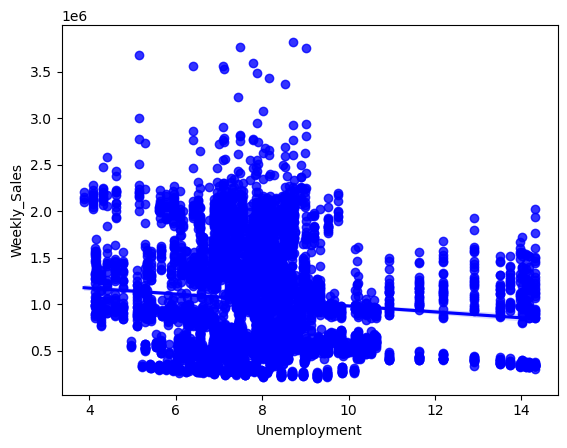

In [3]:
input1 = df
sns.regplot(data = input1, x="Unemployment", y="Weekly_Sales",color="blue")
plt.show()

<Axes: >

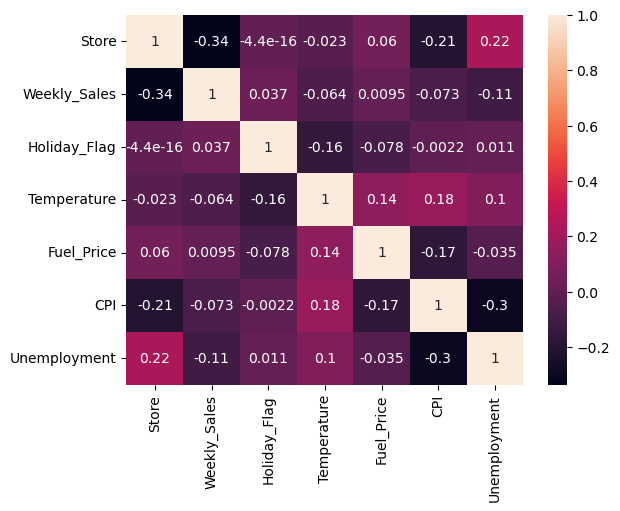

In [6]:
data = df.drop(["Date"], axis = 1)
sns.heatmap(data.corr(), annot = True)

In [7]:
#Mean Weekly Sales of all stores

dict_sum = {}
dict_mean = {}
weekly_sales_sum = 0
for i in range(1,46):
    for j in df.index:
        if df["Store"].loc[j] == i:
            weekly_sales_sum += df["Weekly_Sales"].loc[j]
    dict_mean[i] = (weekly_sales_sum/143)
    dict_sum[i] = (weekly_sales_sum)
    weekly_sales_sum = 0
print("Mean:")
print(dict_mean)

Mean:
{1: 1555264.3975524479, 2: 1925751.3355244761, 3: 402704.44104895106, 4: 2094712.9606993007, 5: 318011.8104895105, 6: 1564728.1862937063, 7: 570617.3086713287, 8: 908749.5183916084, 9: 543980.5523776223, 10: 1899424.572657342, 11: 1356383.1244755238, 12: 1009001.6094405593, 13: 2003620.306293707, 14: 2020978.400979021, 15: 623312.4749650348, 16: 519247.7300699302, 17: 893581.390419581, 18: 1084718.421048951, 19: 1444999.0356643356, 20: 2107676.8703496507, 21: 756069.0833566433, 22: 1028501.0389510491, 23: 1389864.4604895099, 24: 1356755.393566433, 25: 706721.5326573426, 26: 1002911.8446853153, 27: 1775216.201958042, 28: 1323522.2418181808, 29: 539451.4287412586, 30: 438579.6162237763, 31: 1395901.4370629368, 32: 1166568.1549650352, 33: 259861.69202797214, 34: 966781.5594405596, 35: 919724.979580419, 36: 373511.99279720266, 37: 518900.281958042, 38: 385731.65328671347, 39: 1450668.129160839, 40: 964128.0404895111, 41: 1268125.4188111883, 42: 556403.8631468529, 43: 633324.723146853

In [8]:
#Median of all stores

dict_median = {}
for i in range(1,46):
    dict_median[i] = (df["Weekly_Sales"][143*i-143:143*i].median())
print(dict_median)

{1: 1534849.64, 2: 1879107.31, 3: 395107.35, 4: 2073951.38, 5: 310338.17, 6: 1524390.07, 7: 557166.35, 8: 893399.77, 9: 536537.64, 10: 1827521.71, 11: 1323243.35, 12: 981615.81, 13: 1958823.56, 14: 2004330.3, 15: 603318.89, 16: 508520.09, 17: 872817.62, 18: 1060433.1, 19: 1408968.55, 20: 2053165.41, 21: 737014.09, 22: 996628.8, 23: 1358444.07, 24: 1339630.35, 25: 685676.58, 26: 996723.58, 27: 1731935.43, 28: 1266460.45, 29: 518628.42, 30: 438068.71, 31: 1378340.18, 32: 1144901.52, 33: 258427.39, 34: 950154.24, 35: 849779.14, 36: 373267.58, 37: 518124.16, 38: 380870.09, 39: 1416005.59, 40: 954233.87, 41: 1243814.77, 42: 556046.12, 43: 634815.1, 44: 298080.45, 45: 764014.06}


In [9]:
from statistics import mode

In [10]:
#Mode of all stores

dict_mode = {}
for i in range(1,46):
    dict_mode[i] = (mode(df["Weekly_Sales"][143*i-143:143*i]))
print(dict_mode)

{1: 1643690.9, 2: 2136989.46, 3: 461622.22, 4: 2135143.87, 5: 317173.1, 6: 1652635.1, 7: 496725.44, 8: 1004137.09, 9: 549505.55, 10: 2193048.75, 11: 1528008.64, 12: 1100046.37, 13: 1967220.53, 14: 2623469.95, 15: 652122.44, 16: 477409.3, 17: 789036.02, 18: 1205307.5, 19: 1507637.17, 20: 2401395.47, 21: 798593.88, 22: 1033017.37, 23: 1364721.58, 24: 1388725.63, 25: 677231.63, 26: 1034119.21, 27: 1874289.79, 28: 1672352.29, 29: 538634.46, 30: 465108.52, 31: 1469252.05, 32: 1087616.19, 33: 274593.43, 34: 956228.96, 35: 1230613.5, 36: 467546.74, 37: 536006.73, 38: 358496.14, 39: 1230596.8, 40: 1001943.8, 41: 1086533.18, 42: 543384.01, 43: 647029.28, 44: 281090.95, 45: 890689.51}


In [11]:
#Standard Deviation for all stores

dict_std = {}
for i in range(1,46):
    dict_std[i] = df["Weekly_Sales"][143*i-143:143*i].std()
print(dict_std)

{1: 155980.76776119988, 2: 237683.69468179933, 3: 46319.63155690983, 4: 266201.4422969777, 5: 37737.9657447451, 6: 212525.8558619775, 7: 112585.46921978753, 8: 106280.8298809133, 9: 69028.66658471413, 10: 302262.0625044809, 11: 165833.88786308066, 12: 139166.8718803828, 13: 265506.9957755695, 14: 317569.9494755083, 15: 120538.65204319071, 16: 85769.68013311693, 17: 112162.93608702629, 18: 176641.51083924595, 19: 191722.63873007408, 20: 275900.56274241407, 21: 128752.81285322402, 22: 161251.3506309915, 23: 249788.03806798684, 24: 167745.67756711715, 25: 112976.78860046035, 26: 110431.2881409933, 27: 239930.13568818377, 28: 181758.96753857305, 29: 99120.136596145, 30: 22809.665590198507, 31: 125855.94293256964, 32: 138017.252087409, 33: 24132.927322245505, 34: 104630.16467575563, 35: 211243.4577914686, 36: 60725.17357888971, 37: 21837.4611900489, 38: 42768.16944995036, 39: 217466.45483303475, 40: 119002.11285761207, 41: 187907.16276563765, 42: 50262.92552974958, 43: 40598.4132602531, 44:

In [12]:
#Variance of Weekly Sales in all stores

dict_var = {}
for i in range(1,46):
    dict_var[i] = (df["Weekly_Sales"][143*i-143:143*i].var())
print(dict_var)

#MAKE SCATTER PLOT AND COMMENT ON SAMPLE-SAMPLE VARIANCE

{1: 24329999911.37337, 2: 56493538717.5908, 3: 2145508267.567877, 4: 70863207880.99113, 5: 1424154058.5515547, 6: 45167239409.866035, 7: 12675487879.439724, 8: 11295614800.175632, 9: 4764956810.463628, 10: 91362354429.46272, 11: 27500878363.78481, 12: 19367418228.970882, 13: 70493964805.76828, 14: 100850672809.8769, 15: 14529566636.389404, 16: 7356438030.137192, 17: 12580524231.662346, 18: 31202223351.571445, 19: 36757570201.622505, 20: 76121120521.58075, 21: 16577286817.617329, 22: 26001998080.31897, 23: 62394063961.85404, 24: 28138612342.451233, 25: 12763754762.473108, 26: 12195069400.479088, 27: 57566470011.35027, 28: 33036322280.688057, 29: 9824801478.838446, 30: 520280844.33668584, 31: 15839718371.446224, 32: 19048761873.7594, 33: 582398181.1407837, 34: 10947471360.075743, 35: 44623798459.69598, 36: 3687546706.186285, 37: 476874711.2268919, 38: 1829116318.099667, 39: 47291658977.648346, 40: 14161502864.57584, 41: 35309101818.631836, 42: 2526361682.8091516, 43: 1648231159.2502947, 

In [13]:
#Q0, Q1, Q2, Q3, Q4, IQR and Range of all stores

print("Quartiles for each store:\n")
q0 = {}
q1 = {}
q2 = {}
q3 = {}
q4 = {}
dict_iqr = {}
dict_range = {}
for i in range(1,46):
    q0[i] = df["Weekly_Sales"][143*i-143:143*i].quantile(q=0)
    q1[i] = df["Weekly_Sales"][143*i-143:143*i].quantile(q=0.25)
    q2[i] = df["Weekly_Sales"][143*i-143:143*i].quantile(q=0.5)
    q3[i] = df["Weekly_Sales"][143*i-143:143*i].quantile(q=0.75)
    q4[i] = df["Weekly_Sales"][143*i-143:143*i].quantile(q=1)
    dict_range[i] = df["Weekly_Sales"][143*i-143:143*i].quantile(q=1) - df["Weekly_Sales"][143*i-143:143*i].quantile(q=0)
    dict_iqr[i] = df["Weekly_Sales"][143*i-143:143*i].quantile(q=0.75) - df["Weekly_Sales"][143*i-143:143*i].quantile(q=0.25)
print(f"Q0:\n{q0}\n\nQ1:\n{q1}\n\nQ2:\n{q2}\n\nQ3:\n{q3}\n\nQ4:\n{q4}")
print(f"\nIQR:\n{dict_iqr}\n\nRange:\n{dict_range}")

Quartiles for each store:

Q0:
{1: 1316899.31, 2: 1650394.44, 3: 339597.38, 4: 1762539.3, 5: 260636.71, 6: 1261253.18, 7: 372673.61, 8: 772539.12, 9: 452905.22, 10: 1627707.31, 11: 1100418.69, 12: 802105.5, 13: 1633663.12, 14: 1479514.66, 15: 454183.42, 16: 368600.0, 17: 635862.55, 18: 540922.94, 19: 1181204.53, 20: 1761016.51, 21: 596218.24, 22: 774262.28, 23: 1016756.1, 24: 1057290.41, 25: 558794.63, 26: 809833.21, 27: 1263534.86, 28: 1079669.11, 29: 395987.24, 30: 369722.32, 31: 1198071.6, 32: 955463.84, 33: 209986.25, 34: 836717.75, 35: 576332.05, 36: 270677.98, 37: 451327.61, 38: 303908.81, 39: 1158698.44, 40: 764014.75, 41: 991941.73, 42: 428953.6, 43: 505405.85, 44: 241937.11, 45: 617207.58}

Q1:
{1: 1458104.69, 2: 1803500.635, 3: 367860.595, 4: 1929611.49, 5: 294696.0, 6: 1456147.17, 7: 497653.155, 8: 855905.435, 9: 506766.72, 10: 1740771.31, 11: 1267235.5899999999, 12: 940077.46, 13: 1877475.705, 14: 1873297.9, 15: 565182.54, 16: 466043.28500000003, 17: 817518.77, 18: 1000578.

In [14]:
#Q0, Q4, Range and IQR of entire data

max = df["Weekly_Sales"].max()
min = df["Weekly_Sales"].min()
print(f"Maximum weekly sales: {max}\nMinimum weekly sales: {min}")
range = max - min
iqr = df["Weekly_Sales"].quantile(q=0.75) - df["Weekly_Sales"].quantile(q=0.25)
print(f"Range of weekly sales: {range}")
print(f"Inter quartile range: {iqr}")

Maximum weekly sales: 3818686.45
Minimum weekly sales: 209986.25
Range of weekly sales: 3608700.2
Inter quartile range: 866808.5549999999


In [15]:
#Weeks

lim = 0
weeks = []
while lim < 143:
    lim += 1
    weeks.append(lim)
print(weeks)
lim1 = 0
stores = []
while lim1 < 45:
    lim1+= 1
    stores.append(lim1)
print(stores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


In [16]:
#Simple Random Sampling to generate random stores to take as population from data

#st = random.sample(stores,1)
#st = st[0]
st = 13
print(st)

13


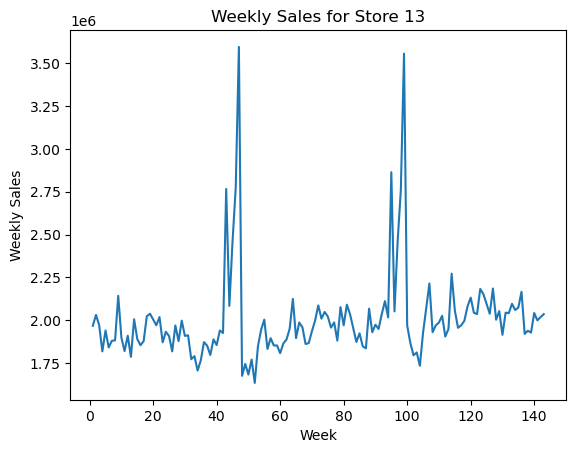

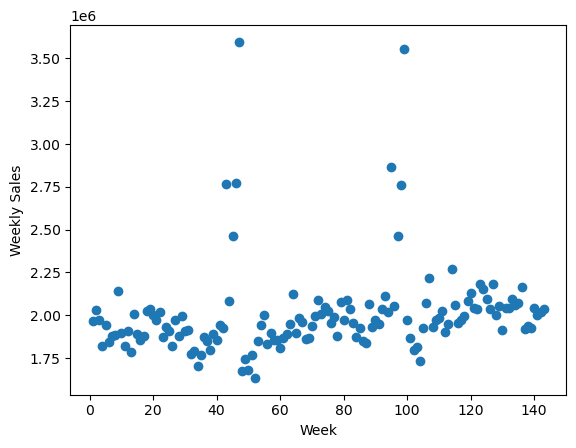

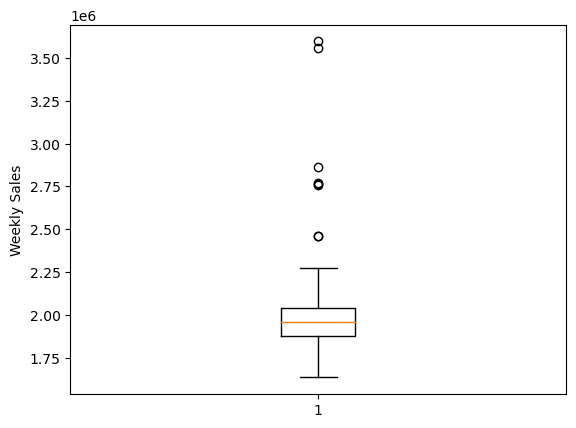

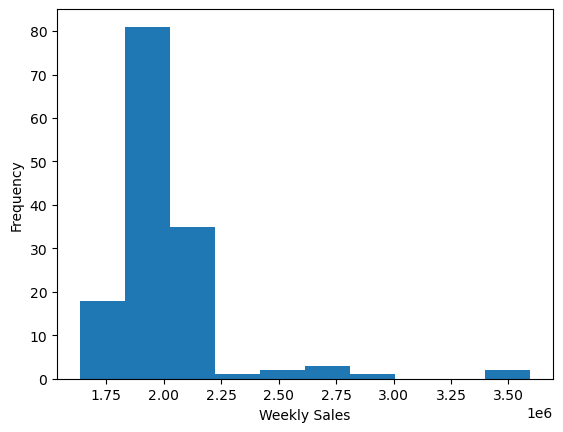

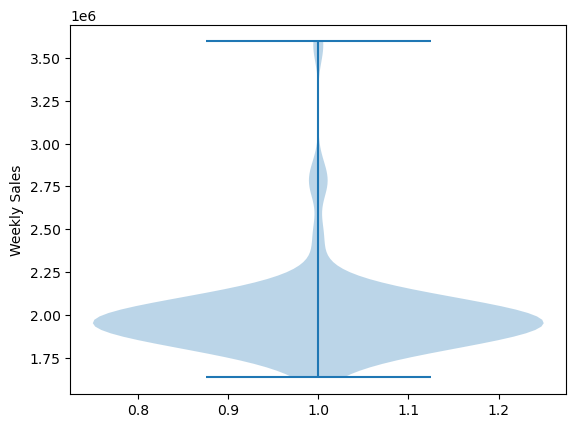

In [20]:
"""First Store"""


#Line Plot
plt.plot(weeks, df["Weekly_Sales"].iloc[143*st - 143:143*st])
plt.title(f"Weekly Sales for Store {st}")
plt.xlabel("Week")
plt.ylabel("Weekly Sales")
plt.show()

#Scatter Plot

plt.scatter(weeks, df["Weekly_Sales"].iloc[143*st - 143:143*st])
plt.xlabel("Week")
plt.ylabel("Weekly Sales")
plt.show()

#Box Plot

plt.boxplot(df["Weekly_Sales"].iloc[143*st - 143:143*st])
plt.ylabel("Weekly Sales")
plt.show()

#Histogram

plt.hist(df["Weekly_Sales"].iloc[143*st - 143:143*st])
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

#Violin Plot

plt.violinplot(df["Weekly_Sales"].iloc[143*st - 143:143*st])
plt.ylabel("Weekly Sales")
plt.show()

In [21]:
"""Store 2"""

"""
#Line Plot
st = stores[1]
plt.plot(df["Weekly_Sales"].iloc[143*st - 143:143*st])
plt.title(f"Weekly Sales for Store {st}")
plt.xlabel("Index")
plt.ylabel("Weekly Sales")
plt.show()

#Scatter Plot

plt.scatter(weeks, df["Weekly_Sales"].iloc[143*st - 143:143*st])
plt.xlabel("Week")
plt.ylabel("Weekly Sales")
plt.show()

#Box Plot

plt.boxplot(df["Weekly_Sales"].iloc[143*st - 143:143*st])
plt.ylabel("Weekly Sales")
plt.show()

#Histogram

plt.hist(df["Weekly_Sales"].iloc[143*st - 143:143*st])
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

#Violin Plot

plt.violinplot(df["Weekly_Sales"].iloc[143*st - 143:143*st])
plt.ylabel("Weekly Sales")
plt.show()
"""

'\n#Line Plot\nst = stores[1]\nplt.plot(df["Weekly_Sales"].iloc[143*st - 143:143*st])\nplt.title(f"Weekly Sales for Store {st}")\nplt.xlabel("Index")\nplt.ylabel("Weekly Sales")\nplt.show()\n\n#Scatter Plot\n\nplt.scatter(weeks, df["Weekly_Sales"].iloc[143*st - 143:143*st])\nplt.xlabel("Week")\nplt.ylabel("Weekly Sales")\nplt.show()\n\n#Box Plot\n\nplt.boxplot(df["Weekly_Sales"].iloc[143*st - 143:143*st])\nplt.ylabel("Weekly Sales")\nplt.show()\n\n#Histogram\n\nplt.hist(df["Weekly_Sales"].iloc[143*st - 143:143*st])\nplt.xlabel("Weekly Sales")\nplt.ylabel("Frequency")\nplt.show()\n\n#Violin Plot\n\nplt.violinplot(df["Weekly_Sales"].iloc[143*st - 143:143*st])\nplt.ylabel("Weekly Sales")\nplt.show()\n'

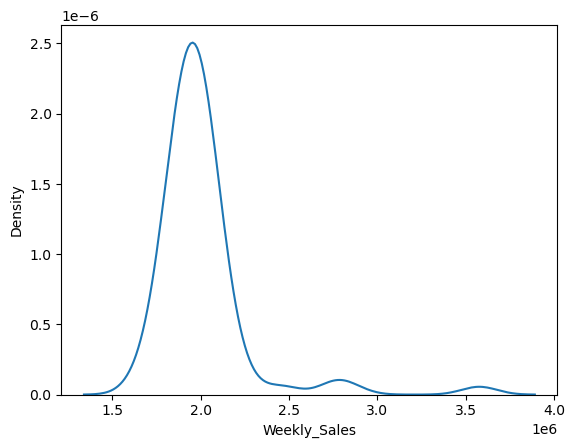

In [22]:
"""Generating multiple samples for the first randomly chosen store"""

from random import choice

population = list(df.index[143*st - 143:143*st])
sample_index = []
sample = []
n_sample = 50
sample_size = 30
i = 0
while i <n_sample:
    """Simple Random Sampling"""
    sample_index.append([k for k in random.sample(population, 30) if k not in {df.index[143*st - 143 + 1], df.index[143*st - 143 + 31], df.index[143*st - 143 + 42], df.index[143*st - 143 + 47], df.index[143*st - 143 + 53], df.index[143*st - 143 + 83], df.index[143*st - 143 + 94], df.index[143*st - 143 + 99], df.index[143*st - 143 + 105], df.index[143*st - 143 + 135]}])
    i += 1
#print(sample_index)

count = 0
for i in sample_index:
    sample_temp = []
    for j in i:
        sample_temp.append(df["Weekly_Sales"].loc[j])
    sample.append(sample_temp)
#print(sample)

"""Kernel Density Plot"""

sns.kdeplot(data = df["Weekly_Sales"][143*st - 143:143*st])
plt.show()

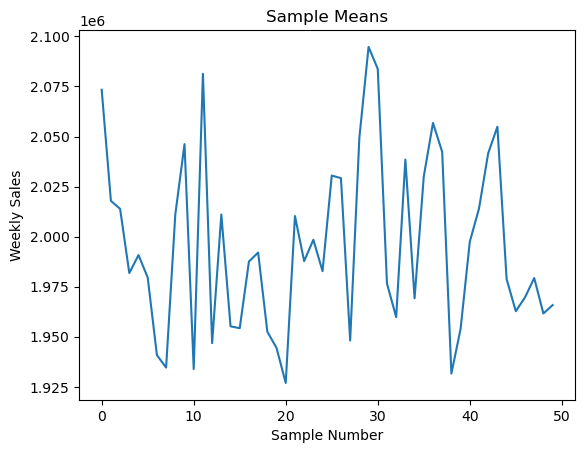

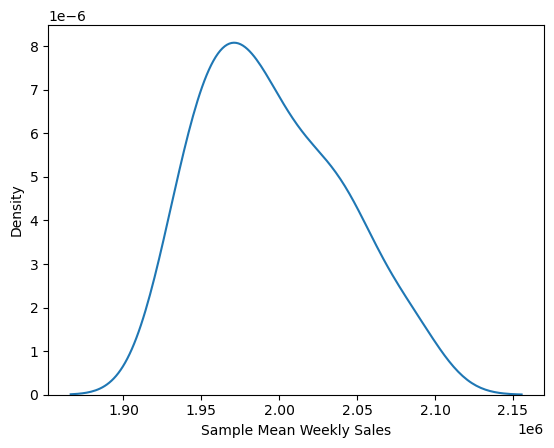

In [66]:
#Comparing Sample Mean

i = 0
sample_mean = []
while i <n_sample:
    length = len(sample[i])
    sample_mean.append(sum(sample[i])/length)
    i+=1
#print(sample_mean)
plt.plot(sample_mean)
plt.xlabel("Sample Number")
plt.ylabel("Weekly Sales")
plt.title("Sample Means")
plt.show()

sns.kdeplot(data = sample_mean)
plt.xlabel("Sample Mean Weekly Sales")
plt.show()

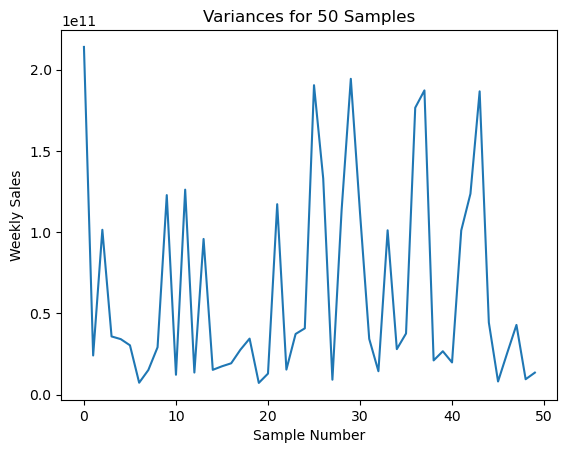

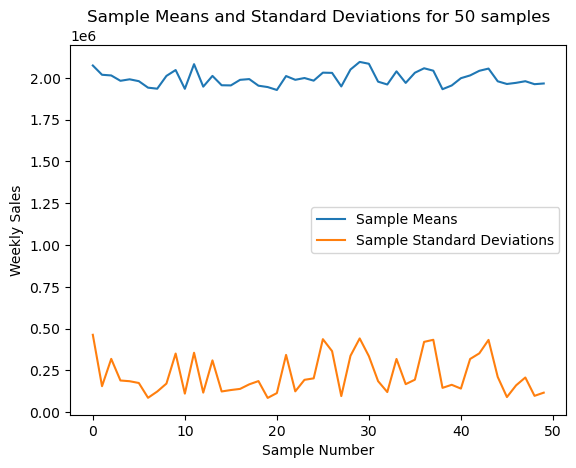

In [67]:
#Sample-Sample Variance

i = 0
sample_var = []
sample_std = []
while i <n_sample:
    sample_var.append(np.array(sample[i]).var())
    sample_std.append(np.array(sample[i]).std())
    i+=1
plt.plot(sample_var)
plt.xlabel("Sample Number")
plt.title(f"Variances for {n_sample} Samples")
plt.ylabel("Weekly Sales")
plt.show()
plt.plot(sample_mean)
plt.plot(sample_std)
plt.legend(["Sample Means","Sample Standard Deviations"])
plt.xlabel("Sample Number")
plt.ylabel("Weekly Sales")
plt.title(f"Sample Means and Standard Deviations for {n_sample} samples")
plt.show()

In [68]:
#Mean, Median, Mode and Kernel Density Plot without the datapoints of weeks with holiday flag

st = 13
print(f"""Mean: {dict_mean[st]}
Median: {dict_median[st]}
Mode: {dict_mode[st]}""")

Mean: 2003620.306293707
Median: 1958823.56
Mode: 1967220.53


In [69]:
"""
The Mean, Median and Mode are very similar.

The distribution of sample means is normally distributed.

Thus, applying Central Limit Theorem, assuming that the data can be
estimated using normal distribution where mean and variance parameters are:
"""
print(f"Mean: {dict_mean[st]}, Var: {dict_var[st]}, Std: {dict_std[st]}")

Mean: 2003620.306293707, Var: 70493964805.76828, Std: 265506.9957755695


In [70]:
"""
With a significance level of 5%, the data lies in the range:
"""
print(f"({dict_mean[st] - (1.96*dict_std[st] / (sample_size ** 0.5))}, {dict_mean[st] + (1.96*dict_std[st] / (sample_size ** 0.5))})")

(1908609.8480627243, 2098630.76452469)
